In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 1000)
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
df = pd.read_excel('../data/data.xlsx')
df.head(10)

,race,bachelors,married,median_age,median_family_income,liquid_assets,checking,savings,stocks,ira_annuity,credit_card_debt,student_loan_debt,medical_debt,liquid_asset_total,total_assets,median_nonhousing_debt,median_net_worth,vehicle_debt,mortgage_debt,homeowner,vehicle_owner
0,White,55.2,54.0,55,90000,95.7,91.8,73.7,39.5,56.2,46.5,18.9,10.9,25000.0,256500.0,2000.0,247500.0,30.3,47.2,79.1,83.6
1,U.S. Black,43.4,24.8,55,41200,82.6,73.8,55.1,9.6,21.2,52.3,28.0,17.1,670.0,700.0,3000.0,8.0,21.4,28.9,33.8,50.7
2,Caribbean Black,44.2,32.1,50,55000,84.8,82.2,74.8,8.3,21.1,52.7,33.7,17.1,3500.0,12000.0,6000.0,12000.0,39.9,44.4,48.7,84.1
3,Cape Verdean,33.3,32.1,37,46000,73.7,72.8,65.9,5.6,38.6,26.8,25.5,2.0,150.0,NaN,2200.0,NaN,21.2,28.6,29.4,85.4
4,Puerto Rican,16.7,18.4,44,25000,57.2,52.9,39.0,9.4,16.2,40.8,19.4,10.6,20.0,3020.0,300.0,3020.0,16.1,17.7,21.2,61.1
5,Dominican,10.5,32.1,40,37000,63.3,61.5,37.1,6.0,7.5,54.8,21.1,19.8,150.0,1724.0,2200.0,0.0,25.8,15.1,17.3,69.0
6,Other Hispanic,38.0,34.4,51,65000,67.5,54.0,47.6,19.4,28.1,39.6,34.4,24.1,700.0,15000.0,5000.0,2700.0,24.1,26.7,34.0,77.2
7,N.E.C,57.2,40.8,49,50000,94.5,80.0,65.5,30.3,33.8,60.1,28.9,13.9,4000.0,18000.0,4000.0,12000.0,22.7,37.3,42.8,83.5
8,Asian,72.7,58.0,43,96000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(8)
df.head(10)

,race,bachelors,married,median_age,median_family_income,liquid_assets,checking,savings,stocks,ira_annuity,credit_card_debt,student_loan_debt,medical_debt,liquid_asset_total,total_assets,median_nonhousing_debt,median_net_worth,vehicle_debt,mortgage_debt,homeowner,vehicle_owner
0,White,55.2,54.0,55,90000,95.7,91.8,73.7,39.5,56.2,46.5,18.9,10.9,25000.0,256500.0,2000.0,247500.0,30.3,47.2,79.1,83.6
1,U.S. Black,43.4,24.8,55,41200,82.6,73.8,55.1,9.6,21.2,52.3,28.0,17.1,670.0,700.0,3000.0,8.0,21.4,28.9,33.8,50.7
2,Caribbean Black,44.2,32.1,50,55000,84.8,82.2,74.8,8.3,21.1,52.7,33.7,17.1,3500.0,12000.0,6000.0,12000.0,39.9,44.4,48.7,84.1
3,Cape Verdean,33.3,32.1,37,46000,73.7,72.8,65.9,5.6,38.6,26.8,25.5,2.0,150.0,NaN,2200.0,NaN,21.2,28.6,29.4,85.4
4,Puerto Rican,16.7,18.4,44,25000,57.2,52.9,39.0,9.4,16.2,40.8,19.4,10.6,20.0,3020.0,300.0,3020.0,16.1,17.7,21.2,61.1
5,Dominican,10.5,32.1,40,37000,63.3,61.5,37.1,6.0,7.5,54.8,21.1,19.8,150.0,1724.0,2200.0,0.0,25.8,15.1,17.3,69.0
6,Other Hispanic,38.0,34.4,51,65000,67.5,54.0,47.6,19.4,28.1,39.6,34.4,24.1,700.0,15000.0,5000.0,2700.0,24.1,26.7,34.0,77.2
7,N.E.C,57.2,40.8,49,50000,94.5,80.0,65.5,30.3,33.8,60.1,28.9,13.9,4000.0,18000.0,4000.0,12000.0,22.7,37.3,42.8,83.5


In [4]:

for column in df.columns:
    df[column] = df[column].replace("NaN", np.nan)

In [9]:
 %%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)
ggplot(df, aes(y=reorder(race, median_net_worth), x=median_net_worth, fill=(race=="White"))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    scale_fill_brewer(palette="Dark2") +
    labs(title='Median net worth', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(median_net_worth)), vjust=-0.25, size=3.5) 
    ggsave('../output/median_net_worth.pdf')

Saving 11.1 x 8.33 in image


In [10]:
zoomed = df[(df.race == "U.S. Black") | (df.race == "Dominican")]

In [14]:
 %%R -i zoomed -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)
ggplot(zoomed, aes(y=reorder(race, median_net_worth), x=median_net_worth, fill=(race== "U.S. Black"))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    scale_fill_brewer(palette="Dark2") +
    labs(title='Median net worth', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(median_net_worth)), vjust=-0.25, size=3.5)

ggsave('../output/median_net_worth_zoomed.pdf')

Saving 11.1 x 8.33 in image


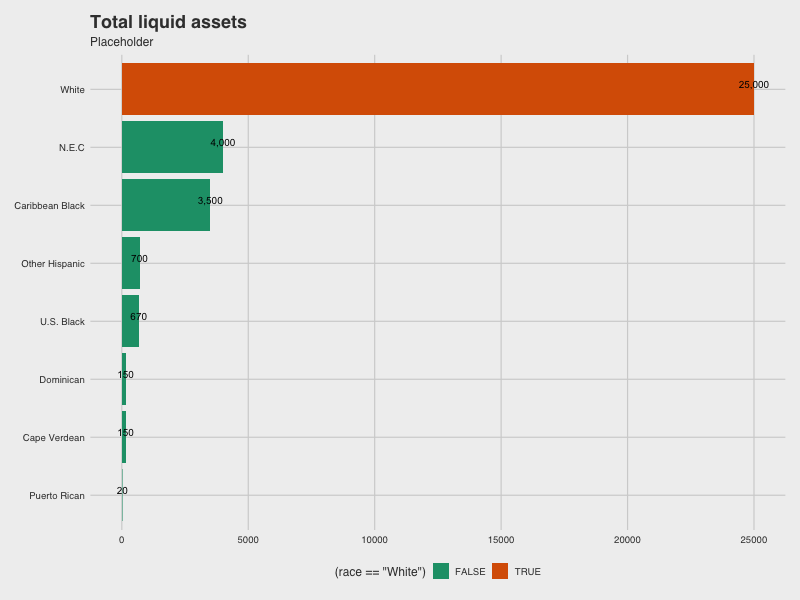

In [12]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, liquid_asset_total), x=liquid_asset_total, fill=(race=="White"))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Total liquid assets', subtitle='Placeholder')+ 
    geom_text(aes(label = scales::comma(liquid_asset_total)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2")

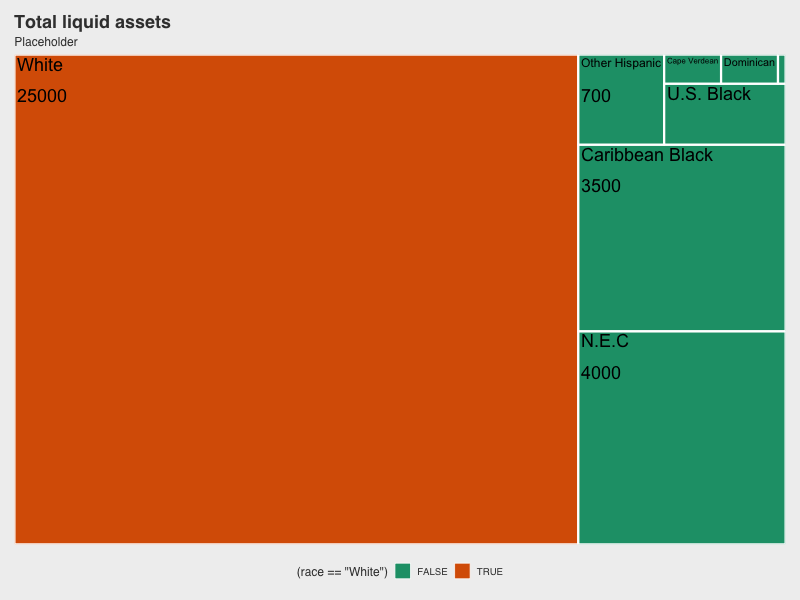

In [15]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)
library(treemapify)

ggplot(df, aes(area=liquid_asset_total, fill=(race=='White'), label=race, subgroup=(race!='White'))) +
    geom_treemap(size=3, color='white') +
    geom_treemap_text() +
    geom_treemap_text(aes(label=liquid_asset_total), padding.y = grid::unit(12, "mm"),) +
    theme_fivethirtyeight() +
    labs(title='Total liquid assets', subtitle='Placeholder') +
    
    scale_fill_brewer(palette="Dark2") 

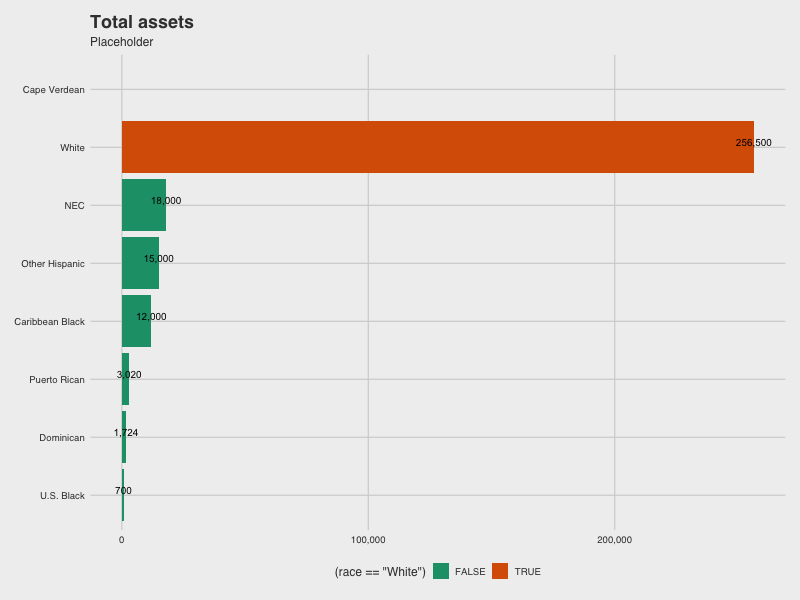

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, total_assets), x=total_assets, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    scale_x_continuous(labels = scales::comma) +
    labs(title='Total assets', subtitle='Placeholder') +
    # Label values
    geom_text(aes(label = scales::comma(total_assets)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2")

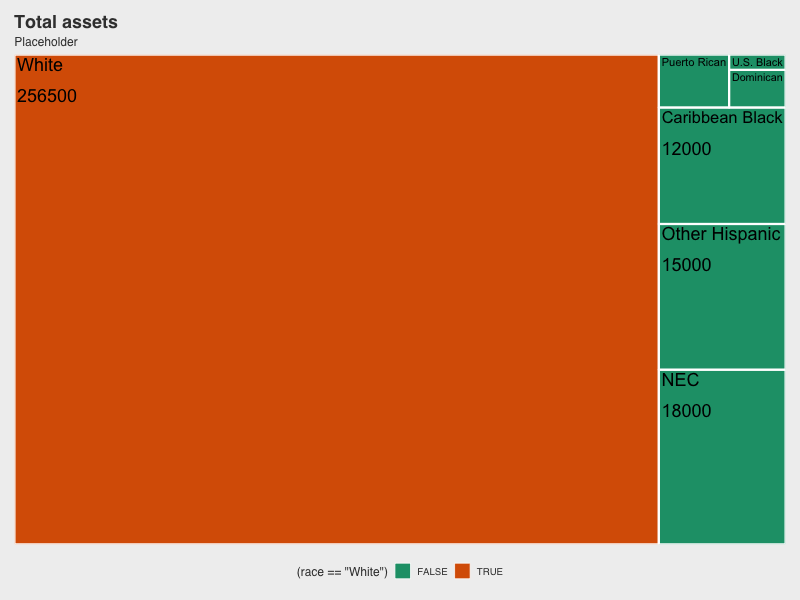

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(area=total_assets, fill=(race=='White'), label=race, subgroup=(race!='White'))) +
    geom_treemap(size=3, color='white') +
    geom_treemap_text() +
    geom_treemap_text(aes(label=total_assets), padding.y = grid::unit(12, "mm"),) +
    theme_fivethirtyeight() +
    labs(title='Total assets', subtitle='Placeholder') +
    
    scale_fill_brewer(palette="Dark2") 

In [16]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, stocks), x=stocks, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Stocks', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(stocks)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2") +
    scale_x_continuous(limits = c(0, 100))

    ggsave('../output/stocks.pdf')

Saving 11.1 x 8.33 in image


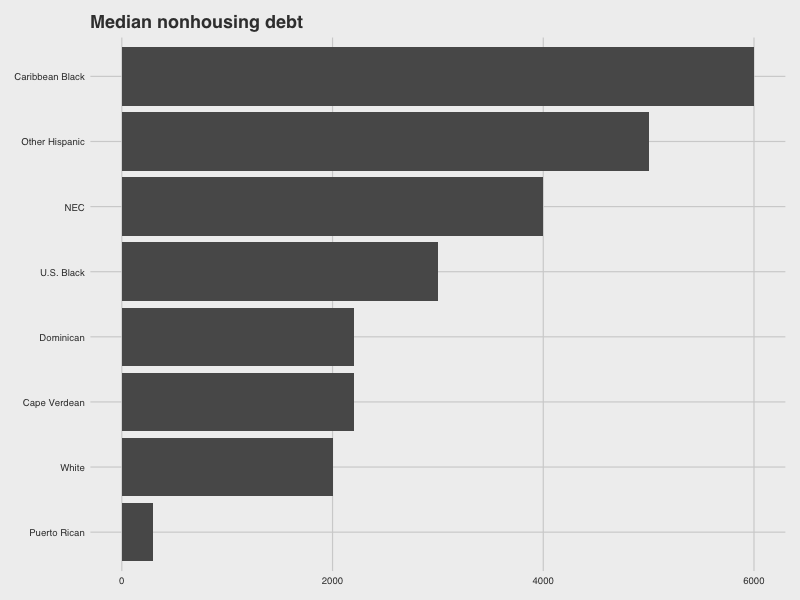

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, median_nonhousing_debt), x=median_nonhousing_debt)) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Median nonhousing debt')

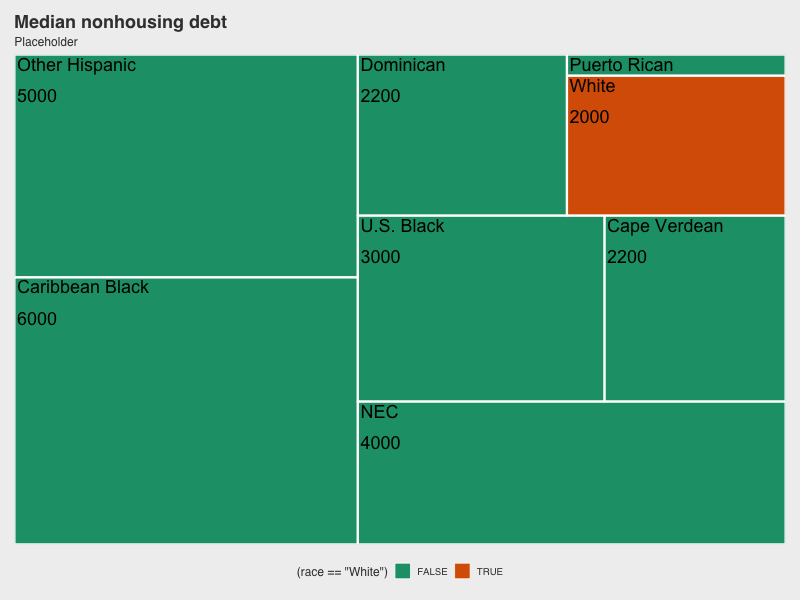

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(area=median_nonhousing_debt, fill=(race=='White'), label=race)) +
    geom_treemap(size=3, color='white') +
    geom_treemap_text() +
    geom_treemap_text(aes(label=median_nonhousing_debt), padding.y = grid::unit(12, "mm"),) +
    theme_fivethirtyeight() +
    labs(title='Median nonhousing debt', subtitle='Placeholder') +
    
    scale_fill_brewer(palette="Dark2") 

In [17]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, ira_annuity), x=ira_annuity, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='IRA/Annuity', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(ira_annuity)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2")+
    # Set x limit to 100
    scale_x_continuous(limits = c(0, 100))

    ggsave('../output/ira_annuity.pdf')

Saving 11.1 x 8.33 in image


In [20]:
mortgage_debt_homeowners = [59.7,85.5,91.3,97,83.6,87.5,78.4,87.1]

df['mortgage_debt_homeowners'] = mortgage_debt_homeowners

In [21]:
# Replace the NaN string with a null value

df['mortgage_debt_homeowners'] = df['mortgage_debt_homeowners'].replace('NaN', np.nan)

In [23]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, mortgage_debt_homeowners), x=mortgage_debt_homeowners, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Mortgage debt homeowners', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(mortgage_debt_homeowners)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2") +
    scale_x_continuous(limits = c(0, 100))

    ggsave('../output/mortgage_debt_homeowners.pdf')

Saving 11.1 x 8.33 in image


In [ ]:
vehicle_debt_carowners = [36.3,42.2,47.4,34.7,26.4,41.7,34.1,27.2]

df['vehicle_debt_carowners'] = vehicle_debt_carowners

# Replace the NaN string with a null value

df['vehicle_debt_carowners'] = df['vehicle_debt_carowners'].replace('NaN', np.nan)

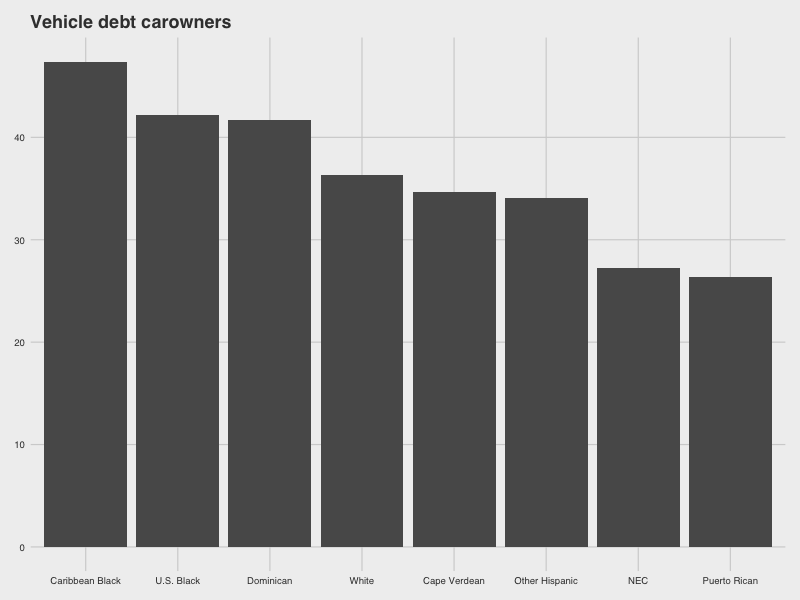

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(x=reorder(race, -vehicle_debt_carowners), y=vehicle_debt_carowners)) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Vehicle debt carowners')

In [24]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, student_loan_debt), x=student_loan_debt, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Student loan debt', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(student_loan_debt)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2") +
    scale_x_continuous(limits = c(0, 100))

    ggsave('../output/student_loan_debt.pdf')
   


Saving 11.1 x 8.33 in image


In [25]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(y=reorder(race, medical_debt), x=medical_debt, fill=(race=='White'))) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Medical debt', subtitle='Placeholder') +
    geom_text(aes(label = scales::comma(medical_debt)), vjust=-0.25, size=3.5) +
    scale_fill_brewer(palette="Dark2") +
    scale_x_continuous(limits = c(0, 100))

    ggsave('../output/medical_debt.pdf')

Saving 11.1 x 8.33 in image


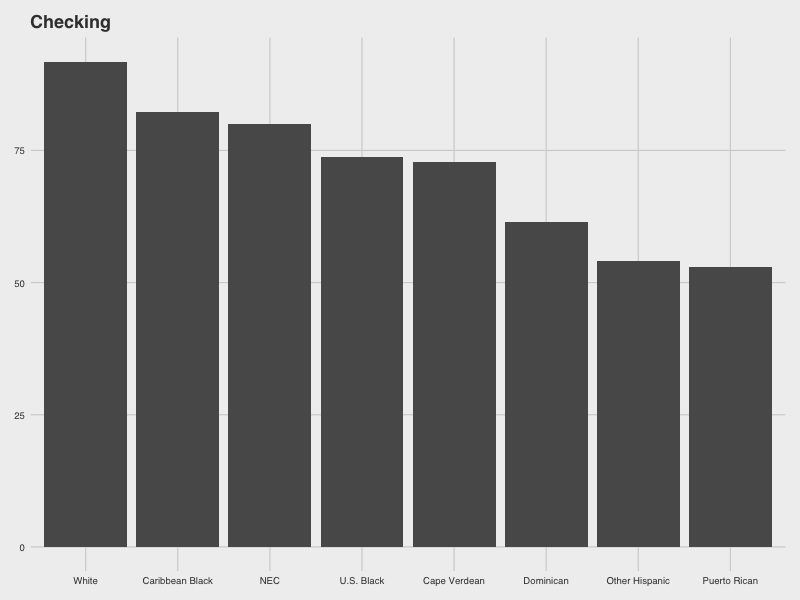

In [ ]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)

ggplot(df, aes(x=reorder(race, -checking), y=checking)) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Checking')

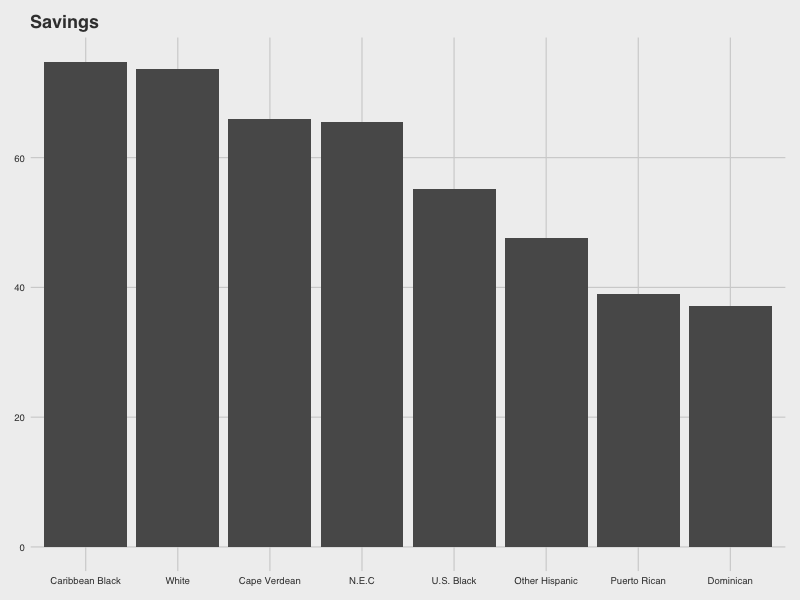

In [28]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)
library(packcircles)

ggplot(df, aes(x=reorder(race, -savings), y=savings)) +
    geom_bar(stat="identity", position="dodge") +
    theme_fivethirtyeight() +
    labs(title='Savings')

In [14]:
%%R -i df -w 800 -h 600

library(ggplot2)
library(dplyr)
library(ggthemes)
library(packcircles)
# library(ggigraph)

# Generate the layout
packing <- circleProgressiveLayout(df$median_net_worth, sizetype='area')
data <- cbind(df, packing)
dat.gg <- circleLayoutVertices(packing, npoints=50)

ggplot() + 
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=id, data_id = id), colour = "black", alpha = 0.6) +
  #scale_fill_viridis() +
  geom_text(data = data, aes(x, y, label = gsub("Group_", "", race)), size=2, color="black") +
  theme_void() + 
  theme(legend.position="none", plot.margin=unit(c(0,0,0,0),"cm") ) + 
  coord_equal()

ggsave('../output/circle.pdf')



Saving 11.1 x 8.33 in image
